In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset


In [53]:
data = pd.read_csv("C:/Users/Len/Documents/courses of FCDS/DS Mesedology/supermarket_dataset.csv")


In [54]:
data = pd.DataFrame(data)

### Start Exploring
Showing the first 5 data rows

In [55]:
data.head()

,Transaction ID,Date,Customer Name,Product Category,Product Name,Quantity,Price,Total Amount,Payment Method,Country
0,9493,NaN,Maria Lopez,Vegetables,Banana,2,15.0,49.77,NaN,INDIA
1,9329,NaN,Jane Smith,Electronics,Laptop,1,15.0,430.60,Credit Card,USA
2,9404,12/11/2024,NaN,Fruits,Apple,10,15.0,463.41,CASH,INDIA
3,3700,"Dec 11, 2024",Maria Lopez,Electronics,Laptop,2,20.0,NaN,Credit Card,NaN
4,3676,2024-12-10,Maria Lopez,Electronics,Laptop,1,20.0,413.77,CASH,NaN


### Showing the data

In [56]:
data

,Transaction ID,Date,Customer Name,Product Category,Product Name,Quantity,Price,Total Amount,Payment Method,Country
0,9493,NaN,Maria Lopez,Vegetables,Banana,2,15.0,49.77,NaN,INDIA
1,9329,NaN,Jane Smith,Electronics,Laptop,1,15.0,430.60,Credit Card,USA
2,9404,12/11/2024,NaN,Fruits,Apple,10,15.0,463.41,CASH,INDIA
3,3700,"Dec 11, 2024",Maria Lopez,Electronics,Laptop,2,20.0,NaN,Credit Card,NaN
4,3676,2024-12-10,Maria Lopez,Electronics,Laptop,1,20.0,413.77,CASH,NaN
...,...,...,...,...,...,...,...,...,...,...
10195,18307,2025-06-26,Jane Smith,Clothing,Shirt,2,347.46,3908.82,CASH,INDIA
10196,16783,2025-06-27,John Doe,Electronics,Laptop,8,395.0,4603.28,Credit Card,USA
10197,17892,2025-06-28,John Doe,Clothing,Shirt,6,147.65,3667.73,CASH,INDIA
10198,10429,2025-06-29,Maria Lopez,Clothing,Shirt,4,410.07,858.64,Credit Card,CANADA


### Shape And Informations about the Dataset and Column's Data Types

In [57]:
data.shape

(10200, 10)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10200 non-null  int64  
 1   Date              8197 non-null   object 
 2   Customer Name     7287 non-null   object 
 3   Product Category  8549 non-null   object 
 4   Product Name      8549 non-null   object 
 5   Quantity          8511 non-null   object 
 6   Price             8539 non-null   object 
 7   Total Amount      9164 non-null   float64
 8   Payment Method    8496 non-null   object 
 9   Country           8960 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 797.0+ KB


#### We found that the price and quantity column are object data types

### Start Cleaning

In [59]:
data = data.dropna()

In [60]:
data = data.drop_duplicates()

In [61]:
data 

,Transaction ID,Date,Customer Name,Product Category,Product Name,Quantity,Price,Total Amount,Payment Method,Country
5,6973,2024-12-10,Jane Smith,Vegetables,Tomato,10,8,163.18,CASH,India
7,1210,2024-12-10,John Doe,Fruits,Apple,1,15 USD,361.98,Debit,USA
9,4077,2024/12/09,Ali Khan,Electronics,Laptop,10,20.0,428.84,CASH,India
23,3605,2024-12-10,Maria Lopez,Clothing,Shirt,2,8,33.19,Debit,Germany
29,8983,2024/12/09,Maria Lopez,Clothing,Shirt,10,20.0,413.18,CASH,INDIA
...,...,...,...,...,...,...,...,...,...,...
10195,18307,2025-06-26,Jane Smith,Clothing,Shirt,2,347.46,3908.82,CASH,INDIA
10196,16783,2025-06-27,John Doe,Electronics,Laptop,8,395.0,4603.28,Credit Card,USA
10197,17892,2025-06-28,John Doe,Clothing,Shirt,6,147.65,3667.73,CASH,INDIA
10198,10429,2025-06-29,Maria Lopez,Clothing,Shirt,4,410.07,858.64,Credit Card,CANADA


#### We have to edit the data types of price, quantity, and country  

### Identify non-numeric values in the 'Price' column


In [62]:
non_numeric_prices = data[pd.to_numeric(data['Price'], errors='coerce').isnull()]['Price']
print(non_numeric_prices)

7       15 USD
65      15 USD
70      15 USD
121     15 USD
142     15 USD
         ...  
9944    15 USD
9951    15 USD
9974    15 USD
9987    15 USD
9993    15 USD
Name: Price, Length: 412, dtype: object


In [63]:
data['Price'].value_counts()

Price
20.0      470
8         463
10.5      427
15 USD    412
15.0      406
         ... 
227.44      1
471.93      1
301.16      1
13.95       1
153.28      1
Name: count, Length: 205, dtype: int64

#### We noticed that the problem is we found "USD" in the Price column

In [64]:
data["Price"] = data["Price"].replace("15 USD","15")

#### Changing data type from Object to Float64

In [65]:
data["Price"] = data["Price"].astype("float64")

#### Checking that the data type has changed

In [66]:
print(data['Price'].dtypes)

float64


### Identify non-numeric values in the 'Quantity' column

In [67]:
non_numeric_Quantities = data[pd.to_numeric(data['Quantity'], errors='coerce').isnull()]['Quantity']
print(non_numeric_Quantities)

39      Five
43      Five
53      Five
63      Five
65      Five
        ... 
9891    Five
9914    Five
9934    Five
9935    Five
9975    Five
Name: Quantity, Length: 437, dtype: object


In [68]:
data['Quantity'].value_counts()

Quantity
10      473
2       470
3       449
Five    437
1       431
5        25
4        21
9        19
8        18
7        18
6        17
Name: count, dtype: int64

#### Changing "Five" into 5

In [69]:
data["Quantity"] = data["Quantity"].replace("Five",5)

#### Changing data type from Object to INT64

In [70]:
data["Quantity"] = data["Quantity"].astype("int64")

#### Checking that the data type has changed

In [71]:
print(data['Quantity'].dtypes)

int64


In [72]:
data.head()

,Transaction ID,Date,Customer Name,Product Category,Product Name,Quantity,Price,Total Amount,Payment Method,Country
5,6973,2024-12-10,Jane Smith,Vegetables,Tomato,10,8.0,163.18,CASH,India
7,1210,2024-12-10,John Doe,Fruits,Apple,1,15.0,361.98,Debit,USA
9,4077,2024/12/09,Ali Khan,Electronics,Laptop,10,20.0,428.84,CASH,India
23,3605,2024-12-10,Maria Lopez,Clothing,Shirt,2,8.0,33.19,Debit,Germany
29,8983,2024/12/09,Maria Lopez,Clothing,Shirt,10,20.0,413.18,CASH,INDIA


### Check if there are any duplicate rows in the DataFrame

In [73]:
data.duplicated().any()

False

### Start Analysis

#### Getting some Statistical information

In [74]:
data.describe()

,Transaction ID,Quantity,Price,Total Amount
count,2378.000000,2378.000000,2378.000000,2378.000000
mean,6292.759882,4.367115,35.229306,449.004108
std,3777.352182,3.201973,82.496970,782.095994
min,0.000000,1.000000,8.000000,10.020000
25%,3430.250000,2.000000,10.500000,138.750000
50%,5883.500000,3.000000,15.000000,273.770000
75%,8444.000000,5.000000,20.000000,407.680000
max,19917.000000,10.000000,499.760000,4985.220000


In [75]:
data["Product Category"].value_counts()

Product Category
Vegetables     503
Fruits         491
Clothing       475
Household      456
Electronics    453
Name: count, dtype: int64

In [76]:
data["Country"].value_counts()

Country
INDIA            360
USA              350
India            344
United States    315
China            310
U.S.A.           305
Germany          301
UK                50
CANADA            43
Name: count, dtype: int64

#### We noticed that there are some countries are duplicated with different Fonts

In [77]:
data['Country'] = data['Country'].replace({'USA': 'United States', 'U.S.A.': 'United States'})

In [78]:
data['Country'] = data['Country'].replace({ 'INDIA': 'India'})

In [79]:
data["Country"].value_counts()

Country
United States    970
India            704
China            310
Germany          301
UK                50
CANADA            43
Name: count, dtype: int64

#### Unique Elements from Payment Methods

In [80]:
data['Payment Method'].nunique()

6

### Conclusions From Visualization of Columns

In [ ]:
data['Payment Method'].value_counts()[:6].plot(kind='bar')

<Axes: ylabel='Product Category'>

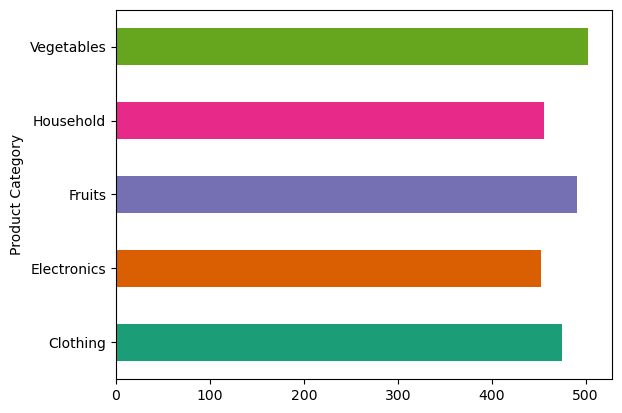

In [82]:
data.groupby('Product Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

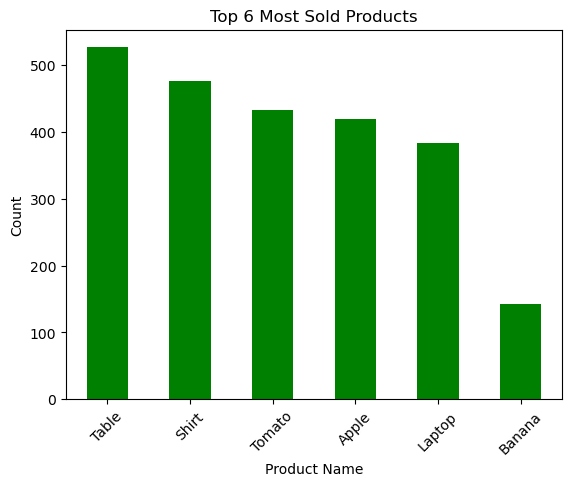

In [83]:
top_10_products = data['Product Name'].value_counts().head(6)
top_10_products.plot(kind='bar', color='green')
plt.title('Top 6 Most Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

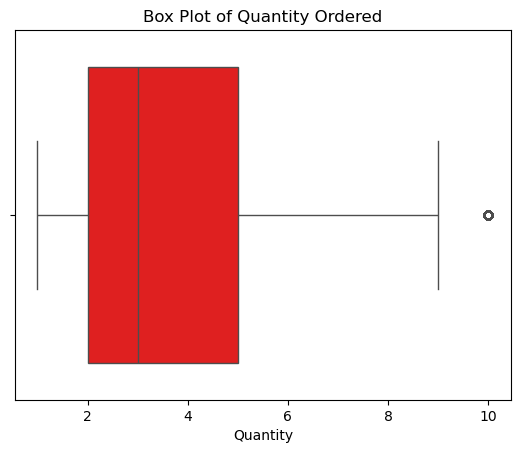

In [84]:
sns.boxplot(x=data['Quantity'], color='red')
plt.title('Box Plot of Quantity Ordered')
plt.show()

### Statiscal Anaylsis

In [85]:
np.mean(data['Quantity'])

4.367115222876366

In [86]:
np.median(data['Quantity'])

3.0

In [87]:
np.max(data['Quantity'])

10

In [88]:
np.min(data['Quantity'])

1

In [89]:
 q1 = data['Quantity'].quantile(0.25)
q1

2.0

In [90]:
q3 = data['Quantity'].quantile(0.75)
q3

5.0

In [91]:
IQR = q3-q1
IQR

3.0

<Figure size 800x800 with 0 Axes>

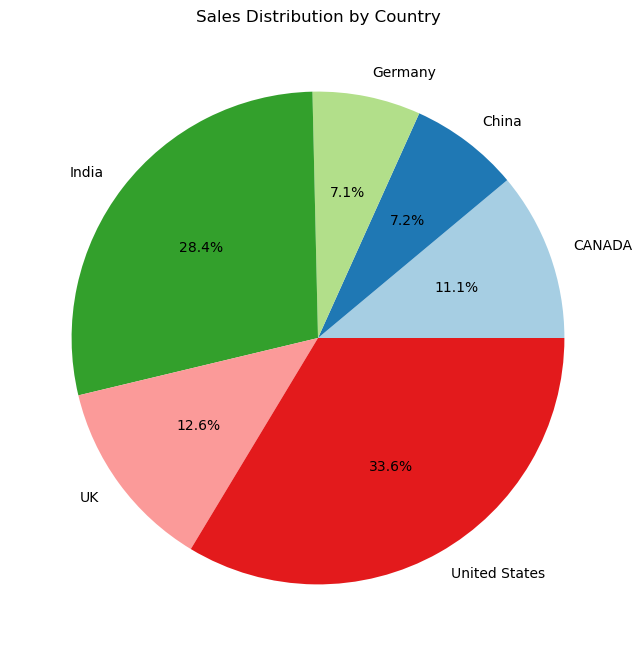

In [92]:
plt.figure(figsize=(8, 8))


sales_by_country = data.groupby('Country')['Total Amount'].sum()


plt.figure(figsize=(8, 8))
plt.pie(sales_by_country, labels=sales_by_country.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Sales Distribution by Country")
plt.show()

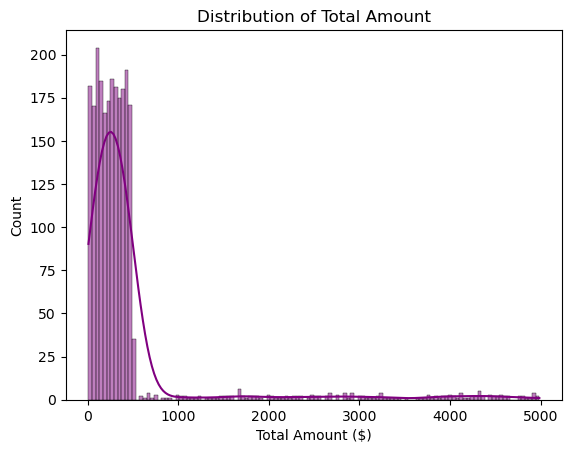

In [93]:
sns.histplot(data['Total Amount'], kde=True, color='purple')
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount ($)')
plt.show()

### Visualizations of Relations Between Columns

#### Correlation between Quantity , price , and total amount

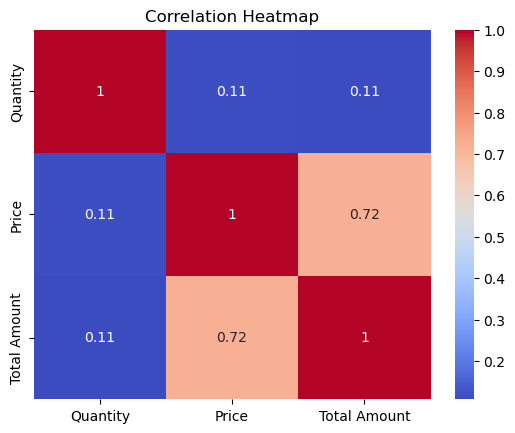

In [94]:
numerical_cols = ['Quantity', 'Price', 'Total Amount']

correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

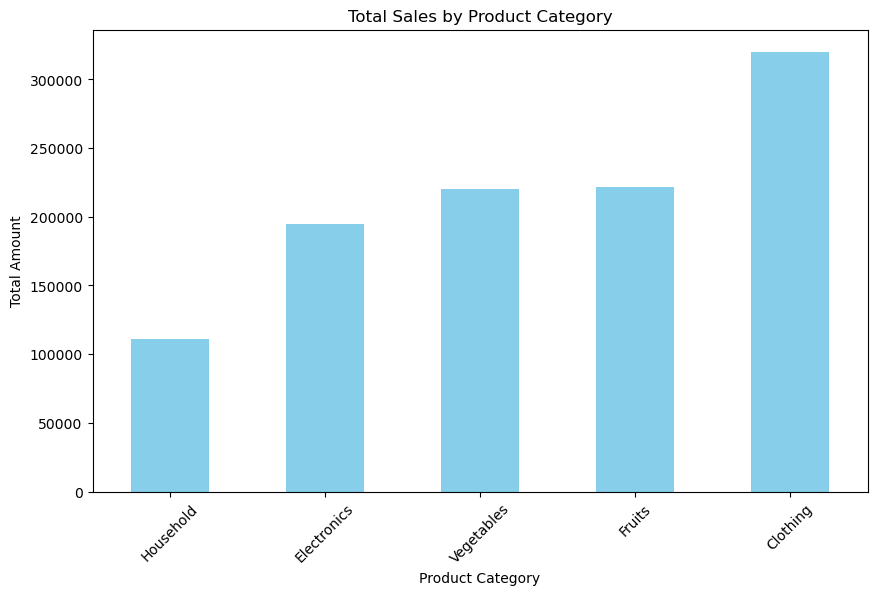

In [95]:
sales_by_category = data.groupby('Product Category')['Total Amount'].sum().sort_values()

sales_by_category.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Total Sales by Product Category")
plt.ylabel("Total Amount")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.show()

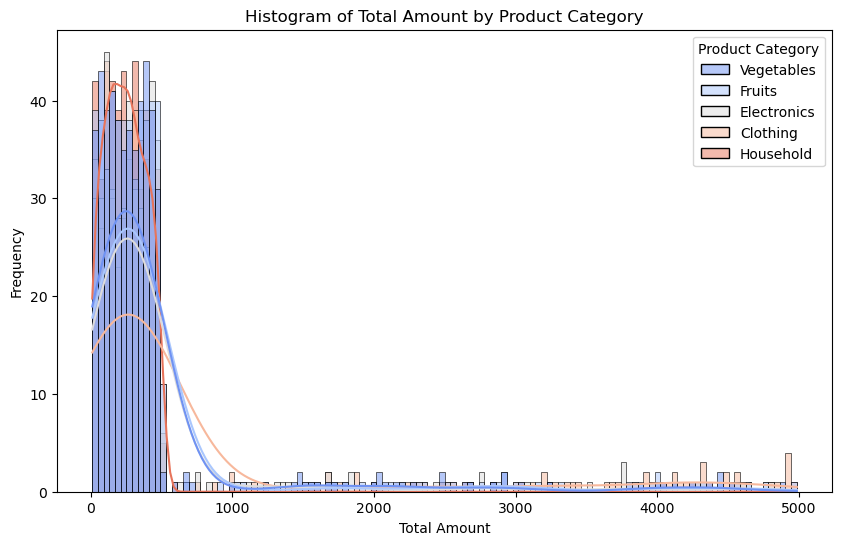

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Total Amount', hue='Product Category', kde=True, palette='coolwarm')
plt.title("Histogram of Total Amount by Product Category")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()

#### We found that the histogram follows left skewed Distribution

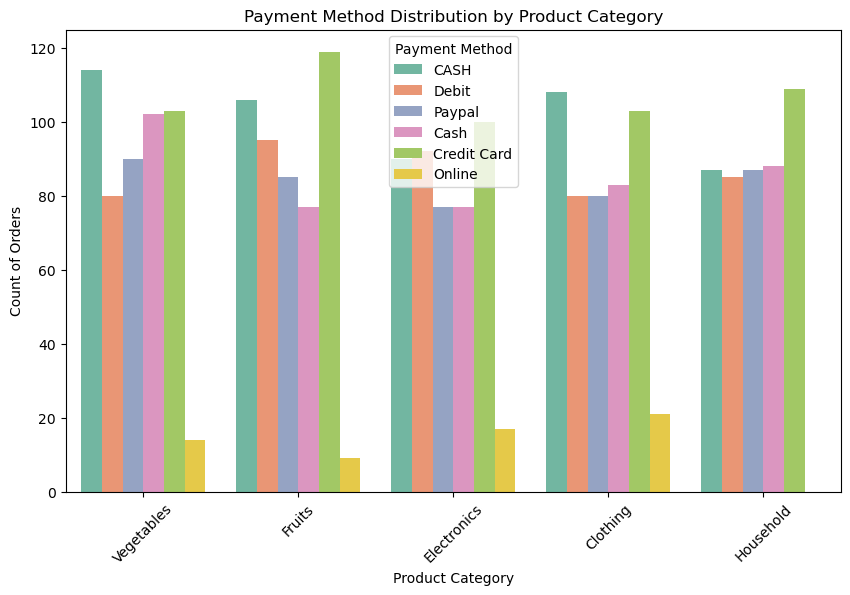

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Product Category', hue='Payment Method', palette='Set2')
plt.title("Payment Method Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Count of Orders")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

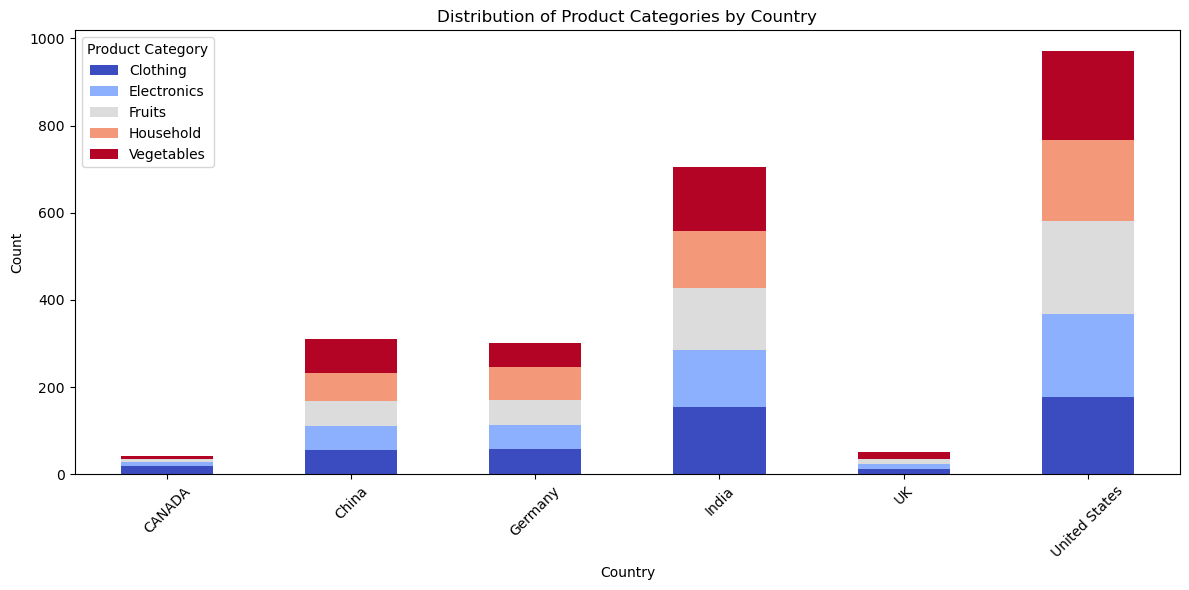

In [98]:
plt.figure(figsize=(12, 6))
category_country = data.groupby(['Country', 'Product Category']).size().unstack(fill_value=0)
category_country.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title('Distribution of Product Categories by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


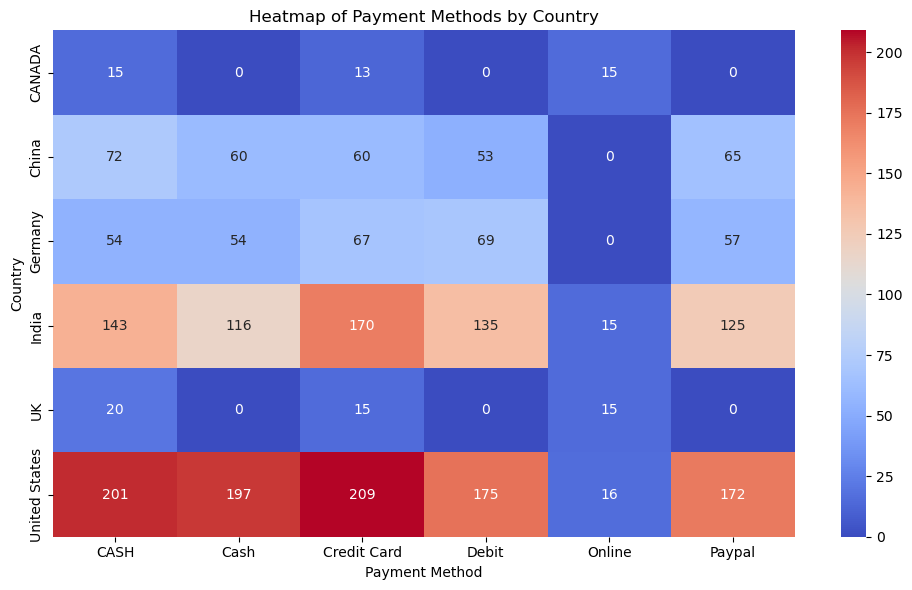

In [99]:
plt.figure(figsize=(10, 6))
payment_country = data.groupby(['Country', 'Payment Method']).size().unstack(fill_value=0)
sns.heatmap(payment_country, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Payment Methods by Country')
plt.xlabel('Payment Method')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## We got some conclusions from our visualization that will help in our future plan